## 확률 과 통계 

## 데이터 

https://www.kaggle.com/zaurbegiev/my-dataset?select=credit_train.csv

#  Loan Data for Dummy Bank ·

https://www.kaggle.com/pjourgensen/default-analysis

In [113]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

from imblearn.over_sampling import SMOTE

import tensorflow as tf

## 데이터 분석

https://www.kaggle.com/pjourgensen/default-analysis

Data Description

- LoanStatNew Description

- addr_state The state provided by the borrower in the loan application

- annual_inc The self-reported annual income provided by the borrower during registration.

- annualincjoint The combined self-reported annual income provided by the co-borrowers during registration

- application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers

- collectionrecoveryfee post charge off collection fee

- collections12mthsexmed Number of collections in 12 months excluding medical collections

- delinq_2yrs The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

- desc Loan description provided by the borrower

- dti A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, - - - excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- dti_joint A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, - excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

- earliestcrline The month the borrower's earliest reported credit line was opened

- emp_length Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

- emp_title The job title supplied by the Borrower when applying for the loan.*

- ficorangehigh The upper boundary range the borrower’s FICO at loan origination belongs to.

- ficorangelow The lower boundary range the borrower’s FICO at loan origination belongs to.

- funded_amnt The total amount committed to that loan at that point in time.

- fundedamntinv The total amount committed by investors for that loan at that point in time.

- grade LC assigned loan grade

- home_ownership The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/loan_final313.csv', parse_dates=['issue_d'])

In [4]:
df.shape

(887379, 30)

In [5]:
df.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    887379 non-null  int64         
 1   year                  887379 non-null  int64         
 2   issue_d               887379 non-null  datetime64[ns]
 3   final_d               887379 non-null  int64         
 4   emp_length_int        887379 non-null  float64       
 5   home_ownership        887379 non-null  object        
 6   home_ownership_cat    887379 non-null  int64         
 7   income_category       887379 non-null  object        
 8   annual_inc            887379 non-null  int64         
 9   income_cat            887379 non-null  int64         
 10  loan_amount           887379 non-null  int64         
 11  term                  887379 non-null  object        
 12  term_cat              887379 non-null  int64         
 13 

In [7]:
df.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [8]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

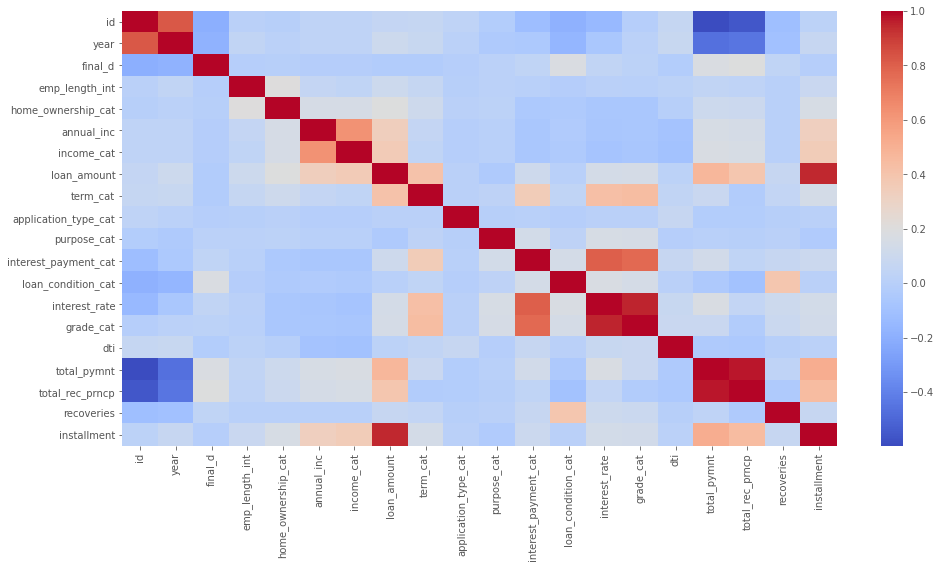

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap = 'coolwarm')

## 정답 칼럼 생성

In [10]:
def defaulted(x):
    if x == 'Good Loan':
        return 0
    else:
        return 1

In [11]:
df['default'] = df['loan_condition'].apply(lambda x: defaulted(x))

In [12]:
df['default'].value_counts()

0    819950
1     67429
Name: default, dtype: int64

## 분석에 필요없는 칼럼 제거

In [13]:
df_l = df.drop(['id', 'year','issue_d', 'final_d'], axis=1)

## emp_length_in 를 정규화 

0과 1 사이

In [14]:
scaler = MinMaxScaler()

In [15]:
df_l['emp_length_int'] = scaler.fit_transform(df_l['emp_length_int'].values.reshape(-1,1))

## home_ownership: Home Owndership status¶

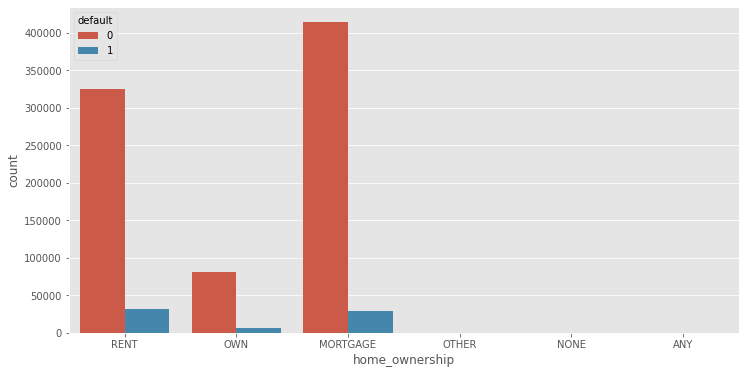

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership',data=df, hue='default')

In [17]:
df_l = pd.concat([df_l, pd.get_dummies(df_l['home_ownership'])],axis=1).drop(['home_ownership', 'home_ownership_cat'],axis=1)

In [18]:
df_l = df_l.drop(['OTHER', 'NONE', 'ANY'],axis=1 )

## income_category: Low, Medium, or High

In [19]:
df_l = pd.concat([df_l, pd.get_dummies(df_l['income_category'])],axis=1).drop(['income_category', 'income_cat'],axis=1)

## annual_inc
Check for outliers
Scale to 0 -> 1

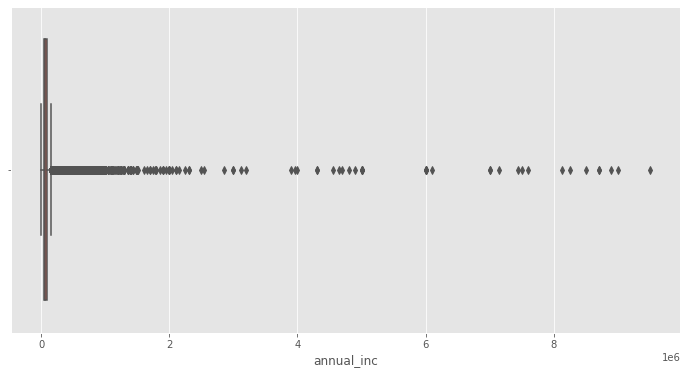

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_l['annual_inc'])

In [22]:
outliers = df_l[df_l['annual_inc'] > df_l['annual_inc'].quantile(0.99)].index

In [23]:
df_l.loc[outliers,'annual_inc'] = df_l['annual_inc'].quantile(0.99)

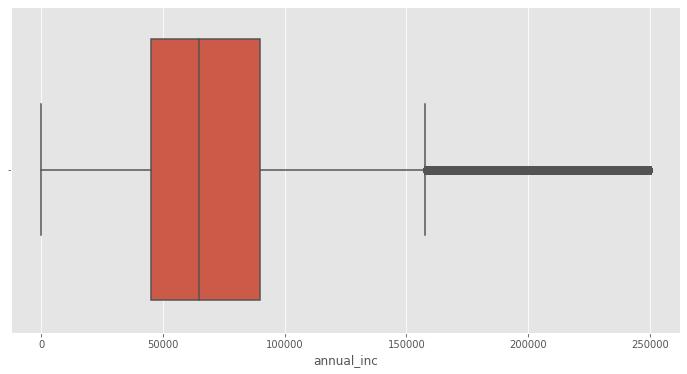

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_l['annual_inc'])

In [26]:
scaler = MinMaxScaler()
df_l['annual_inc'] = scaler.fit_transform(df_l['annual_inc'].values.reshape(-1,1))

## loan_amount
Scale to 0 -> 1


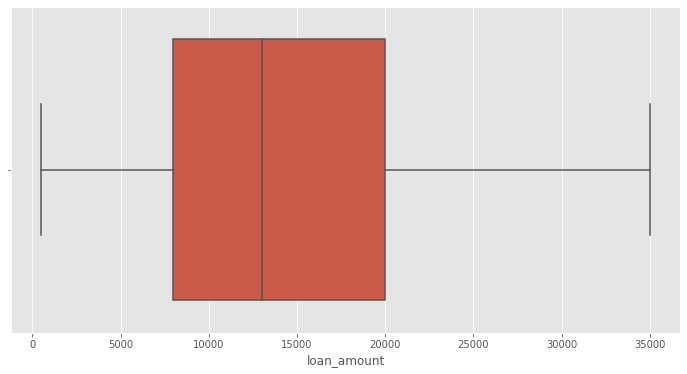

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_l['loan_amount'])

In [28]:
scaler = MinMaxScaler()
df_l['loan_amount'] = scaler.fit_transform(df_l['loan_amount'].values.reshape(-1,1))

## term: Length of the loan
One-hot encode

In [30]:
df_l['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

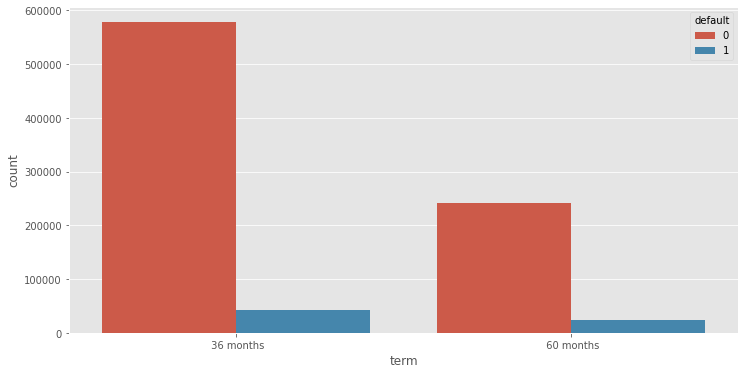

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='term',data=df_l, hue='default')

In [32]:
df_l = pd.concat([df_l, pd.get_dummies(df_l['term_cat'],prefix='term')],axis=1).drop(['term', 'term_cat'],axis=1)

## application_type: Individual or Joint
Won't be included for prediction

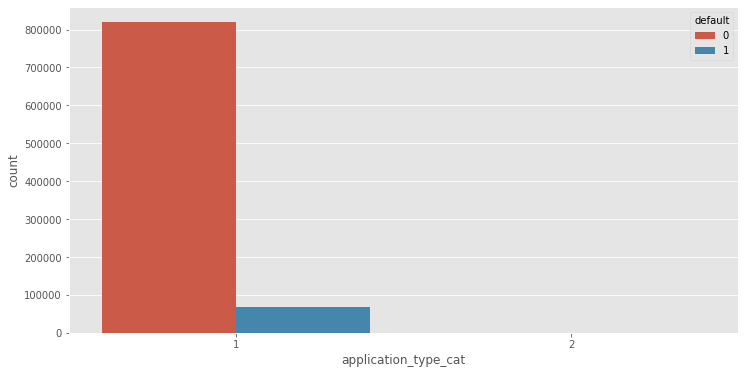

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='application_type_cat',data=df_l, hue='default')

In [34]:
df_l = df_l.drop(['application_type','application_type_cat'],axis=1)

## purpose: Reason for issuing loan
One-hot encode

In [35]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

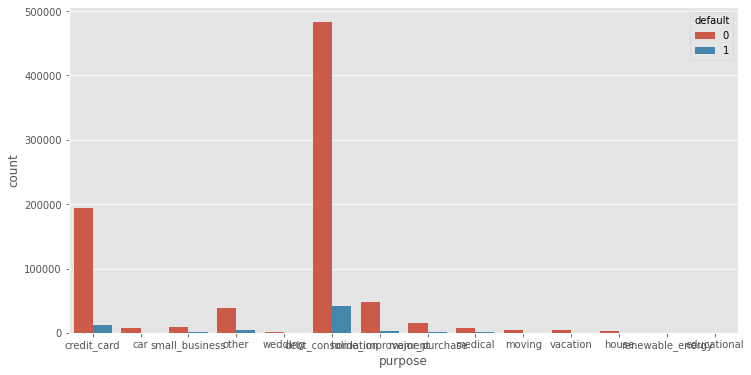

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=df_l, hue='default')

In [37]:
df_l = pd.concat([df_l, pd.get_dummies(df_l['purpose'])],axis=1).drop(['purpose', 'purpose_cat'],axis=1)

In [38]:
df_l = df_l.drop(['car', 'small_business', 'other', 'wedding', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'],axis=1)

## interest_payments: Low or High
One-hot encode

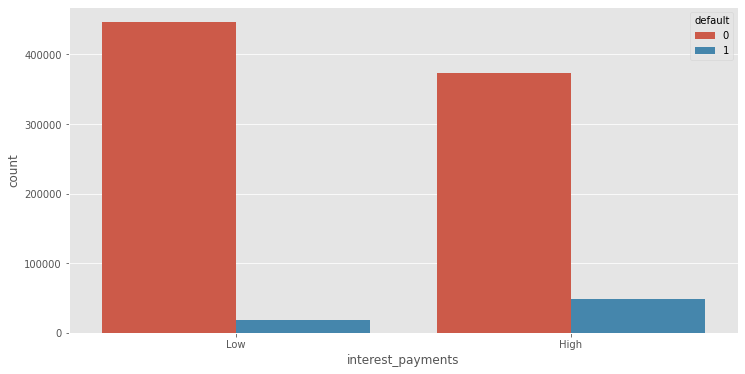

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='interest_payments',data=df_l, hue='default')

In [41]:
df_l = pd.concat([df_l, pd.get_dummies(df_l['interest_payments'],prefix='int')],axis=1).drop(['interest_payments', 'interest_payment_cat'],axis=1)

In [42]:
df_l = df_l.drop('int_High',axis=1)

## loan_condition: Good or bad
Target variable
Has been converted to 'default', so drop

In [43]:
df_l = df_l.drop(['loan_condition', 'loan_condition_cat'],axis=1)

## interest_rate
Scale 0 -> 1

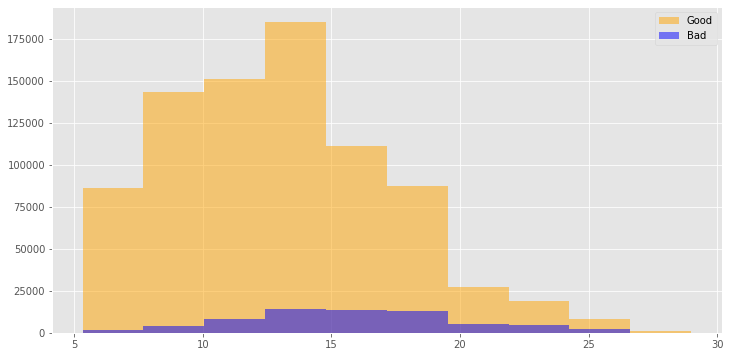

In [44]:
plt.figure(figsize=(12,6))
plt.hist(df_l[df_l['default']==0]['interest_rate'],color='orange',alpha=0.5,label='Good')
plt.hist(df_l[df_l['default']==1]['interest_rate'],color='blue',alpha=0.5,label='Bad')

plt.legend()

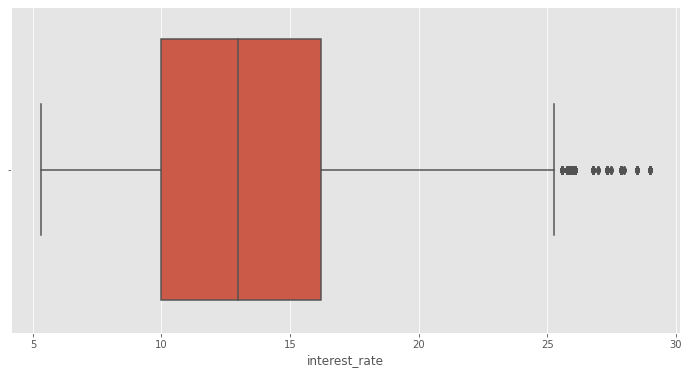

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_l['interest_rate'])

In [46]:
outliers = df_l[df_l['interest_rate'] > df_l['interest_rate'].quantile(.99)].index

In [47]:
df_l.loc[outliers,'interest_rate'] = df_l['interest_rate'].quantile(.99)

In [48]:
scaler = MinMaxScaler()
df_l['interest_rate'] = scaler.fit_transform(df_l['interest_rate'].values.reshape(-1,1))

## grade: Loan grade
Won't be included for prediction

In [49]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   emp_length_int      887379 non-null  float64
 1   annual_inc          887379 non-null  float64
 2   loan_amount         887379 non-null  float64
 3   interest_rate       887379 non-null  float64
 4   grade               887379 non-null  object 
 5   grade_cat           887379 non-null  int64  
 6   dti                 887379 non-null  float64
 7   total_pymnt         887379 non-null  float64
 8   total_rec_prncp     887379 non-null  float64
 9   recoveries          887379 non-null  float64
 10  installment         887379 non-null  float64
 11  region              887379 non-null  object 
 12  default             887379 non-null  int64  
 13  MORTGAGE            887379 non-null  uint8  
 14  OWN                 887379 non-null  uint8  
 15  RENT                887379 non-nul

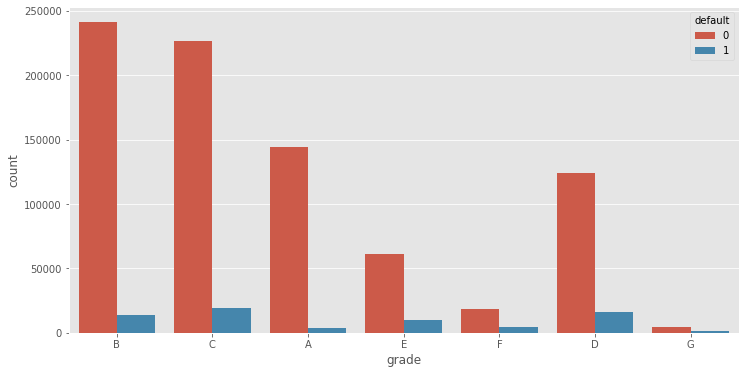

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade',data=df_l, hue='default')

In [51]:
df_l = df_l.drop(['grade', 'grade_cat'],axis=1)

## dti: Ratio of monthly debt payments to annual income
Scale to 0 -> 1

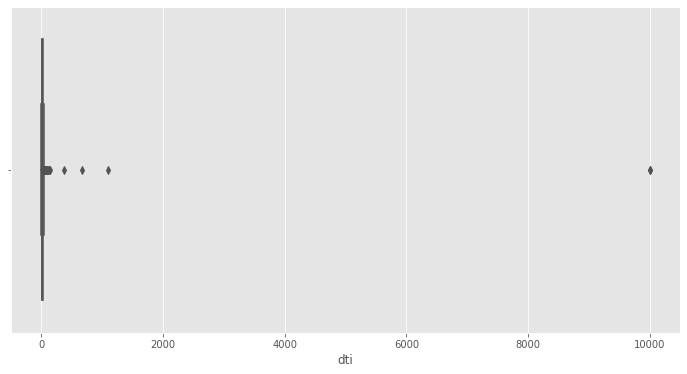

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_l['dti'])

In [54]:
outliers = df_l[df_l['dti'] > df_l['dti'].quantile(.99)].index
df_l.loc[outliers,'dti'] = df_l['dti'].quantile(.99)

In [55]:
scaler = MinMaxScaler()
df_l['dti'] = scaler.fit_transform(df_l['dti'].values.reshape(-1,1))

## total_pymnt
Won't be used for prediction

In [56]:
df_l = df_l.drop('total_pymnt', axis=1)

## total_rec_prncp
Won't be used for prediction

In [57]:
df_l = df_l.drop('total_rec_prncp', axis=1)

## recoveries¶
Won't be used for prediction

In [58]:
df_l =  df_l.drop('recoveries', axis=1)

## installment
Won't be used for prediction

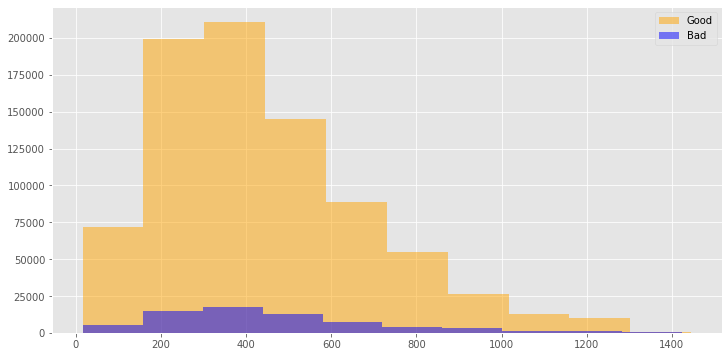

In [60]:
plt.figure(figsize=(12,6))
plt.hist(df_l[df_l['default']==0]['installment'],color='orange',alpha=0.5,label='Good')
plt.hist(df_l[df_l['default']==1]['installment'],color='blue',alpha=0.5,label='Bad')

plt.legend()

In [61]:
df_l = df_l.drop('installment', axis=1)

## region
Won't be included for prediction

In [62]:
df_l = df_l.drop('region', axis=1)

## 파일 저장

In [72]:
df_l.to_clipboardcsv('./data/loan_normal.csv')

## Train Test Split

In [63]:
sum(df_l['default']) / len(df_l)

0.07598669790472842

In [64]:
X = df_l.drop(['default'],axis=1)
y = df_l['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [79]:
X.shape

(887379, 16)

In [80]:
X_train.shape

(621165, 16)

In [81]:
X_test.shape

(266214, 16)

In [65]:
rf_base = RandomForestClassifier(n_estimators=100)
ada_base = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

In [66]:
rf_base.fit(X_train,y_train)
ada_base.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [67]:
rf_base_pred = rf_base.predict(X_test)
ada_base_pred = ada_base.predict(X_test)

In [68]:
print(confusion_matrix(y_test, rf_base_pred))
print('\n')
print(confusion_matrix(y_test, ada_base_pred))

[[245669    229]
 [ 20253     63]]


[[240832   5066]
 [ 19312   1004]]


In [69]:
print(accuracy_score(y_test,rf_base_pred))
print(accuracy_score(y_test,ada_base_pred))

0.923061897571127
0.9084270549257364


In [70]:
print(recall_score(y_test,rf_base_pred))
print(recall_score(y_test,ada_base_pred))

0.0031010041346721797
0.049419177003347116


In [73]:
from xgboost import XGBClassifier

In [74]:
xgb = XGBClassifier()

In [75]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [76]:
xgb_pred = xgb.predict(X_test)

In [77]:
recall_score(y_test,xgb_pred)

0.0

In [82]:
precision_score(y_test,xgb_pred)

/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [78]:
confusion_matrix(y_test, xgb_pred)

array([[245898,      0],
       [ 20316,      0]])

In [100]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region', 'default'],
      dtype='object')

In [103]:
XX = df.drop(['default', 'id', 'year','loan_condition', 'issue_d', 'home_ownership', 'income_category', 
              'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition','loan_condition_cat', 'grade', 'region'],axis=1)
yy = df['default']
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=100)

In [104]:
XX.columns

Index(['final_d', 'emp_length_int', 'home_ownership_cat', 'annual_inc',
       'income_cat', 'loan_amount', 'term_cat', 'application_type_cat',
       'purpose_cat', 'interest_payment_cat', 'interest_rate', 'grade_cat',
       'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment'],
      dtype='object')

In [105]:
xgb_ = XGBClassifier()

In [106]:
xgb_.fit(XX_train, yy_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [107]:
xgb__pred = xgb_.predict(XX_test)

In [108]:
confusion_matrix(yy_test, xgb__pred)

array([[245896,      2],
       [  4847,  15469]])

In [109]:
precision_score(yy_test,xgb__pred)

0.9998707258742163

In [110]:
recall_score(yy_test,xgb__pred)

0.7614195707816499

In [114]:
f1_score(yy_test,xgb__pred)

0.8645038701204347